# Value iteration + policy extraction and policy iteration applied to simple grid world problem described below.

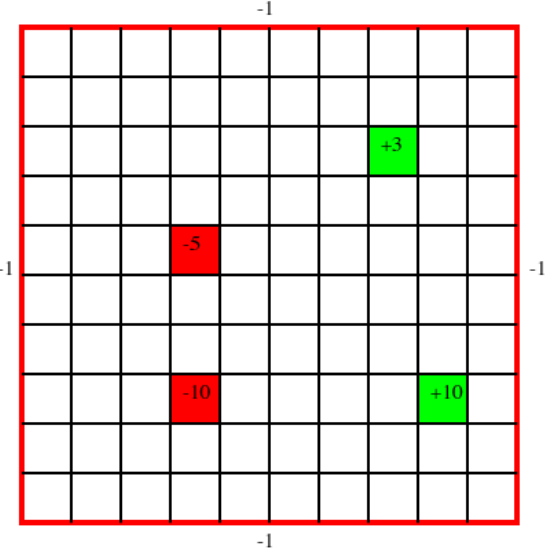




This is 10×10 grid world, where the robot can choose one of four actions: up, down, left, or right. If the agent carries out one of these actions, it has a 70% chance of going one step in the desired direction and a 10% chance of going one step in any of the other three directions. If it bumps into the outside wall, there is a penalty of 1 and the agent does not move. Position (0,0) is at north-west corner and position (9,9) at south-east corner. Position (x,y) means x steps to south and y steps to east starting from (0,0).  

The four rewarding states are
* +10 at position (7,8)
* +3 at position (2,7)
* -5 at position (4,3) 
* -10 at position (7,3).

In each of these states, the agent gets the reward after it carries out an action in that state, not when it enters the state. When the agent reaches the state (7,8), no matter what it does at the next step, it is flung, at random, to one of the four corners of the grid world.




# 1.Value iteration and policy extraction

In [1]:
import numpy as np
import pandas as pd 
import random as rd
import matplotlib.pyplot as plt
import matplotlib




#actions are numbered as 0=up, 1=left, 2=down and 3=right


In [4]:
def giveReward(i,j,act):
    if i==2 and j==7:
        reward=3
    elif i==7 and j==8:
        reward=10
    elif i==4 and j==3:
        reward=-5
    elif i==7 and j==3:
        reward=-10
    elif (i==0 and act==0) or \
        (i==9 and act==2) or \
        (j==0 and act==1)or \
        (j==9 and act==3):
        reward=-2
    else:
        reward=0
    return reward


def giveNextState(i,j,act):
    if i==7 and j==8:
        new_random_state=rd.randint(0,3)
        next_i,next_j=[[0,0], [0,9], [9,0], [9,9]][new_random_state]
    else:
        next_i=i
        next_j=j
        if act==0:
            next_i=i-1
        elif act==1:
            next_j=j-1
        elif act==2:
            next_i=i+1
        else:
            next_j=j+1
        if next_i>9:
            next_i=9
        if next_i<0:
            next_i=0
        if next_j>9:
            next_j=9
        if next_j<0:
            next_j=0

    return [next_i,next_j]

def plotValues(V):
    cmap = matplotlib.cm.get_cmap('brg')
    V_norm = matplotlib.colors.Normalize(vmin=np.min(V), vmax=np.max(V))

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)

    for i in range(10):
        for j in range(10): 
            if (i==2 and j==7): 
                rect = plt.Rectangle((j,9-i), 1, 1, facecolor=cmap(V_norm(V[i,j])),alpha=0.5,
                                     edgecolor='k')
                ax.annotate('+3', (j+0.5,9-i+0.65),fontsize=14)
                
            elif (i==7 and j==8):
                rect = plt.Rectangle((j,9-i), 1, 1, facecolor=cmap(V_norm(V[i,j])),alpha=0.5,edgecolor='k')
                ax.annotate('+10', (j+0.3,9-i+0.65),fontsize=14)
                
            elif (i==4 and j==3):
                rect = plt.Rectangle((j,9-i), 1, 1, facecolor=cmap(V_norm(V[i,j])),alpha=0.5,edgecolor='k')
                ax.annotate('-5', (j+0.65,9-i+0.65),fontsize=14)   
            elif (i==7 and j==3):
                rect = plt.Rectangle((j,9-i), 1, 1, facecolor=cmap(V_norm(V[i,j])),alpha=0.5,edgecolor='k')
                ax.annotate('-10', (j+0.45,9-i+0.65),fontsize=14)
                

            else:
                rect = plt.Rectangle((j,9-i), 1, 1,facecolor=cmap(V_norm(V[i,j])),edgecolor='k')
            ax.annotate(np.round(V[i,j],1), (j+0.3,9-i+0.25),fontsize=12)     
            ax.add_patch(rect)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)    

    
def plotOptimalPolicy(x):

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)

    for i in range(10):
        for j in range(10): 
            if (i==2 and j==7): 
                rect = plt.Rectangle((j,9-i), 1, 1, color='g',alpha=0.5)
                ax.annotate('+3', (j+0.5,9-i+0.65),fontsize=14)
            elif (i==7 and j==8):
                rect = plt.Rectangle((j,9-i), 1, 1, color='g',alpha=0.5)
                ax.annotate('+10', (j+0.3,9-i+0.65),fontsize=14)

            elif (i==4 and j==3):
                rect = plt.Rectangle((j,9-i), 1, 1, color='r',alpha=0.5)
                ax.annotate('-5', (j+0.65,9-i+0.65),fontsize=14)
            elif (i==7 and j==3):
                rect = plt.Rectangle((j,9-i), 1, 1, color='r',alpha=0.5)
                ax.annotate('-10', (j+0.45,9-i+0.65),fontsize=14)

            else:
                rect = plt.Rectangle((j,9-i), 1, 1, fill=False)
            ax.add_patch(rect)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    for i in range(10):
             for j in range(10):
                    if (i==2 and j==7) or (i==7 and j==8) or \
                        (i==4 and j==3) or (i==7 and j==3):
                        if x[i,j]==0 or x[i,j]==2:
                            x_coord=0.5+j-0.25
                            y_coord=9.5-i
                        else:
                            x_coord=0.5+j
                            y_coord=9.5-i-0.15
                    else:
                        x_coord=0.5+j
                        y_coord=9.5-i
                    
                    if x[i,j]==0:
                         plt.quiver(x_coord,y_coord-0.25,0,0.5)
                    elif x[i,j]==1:
                         plt.quiver(x_coord+0.25,y_coord,-0.5,0)
                    elif x[i,j]==2:
                         plt.quiver(x_coord,y_coord+0.25,0,-0.5)
                    else:
                         plt.quiver(x_coord-0.25,y_coord,0.5,0)

                            
                            
def calcQvalues(i,j,discount,V):
    qValues=np.zeros([4,1])
    for act in range(4):
                temp=0
                for resultDir in range(4):
                    reward=giveReward(i,j,resultDir)
                    next_i=giveNextState(i,j,resultDir)[0]
                    next_j=giveNextState(i,j,resultDir)[1]
                    if resultDir==act:
                        prob=0.7
                    else:
                        prob=0.1
                    temp+= prob*(reward + discount*V[next_i,next_j])
                qValues[act]=temp
    return qValues


def getValueWithPolicy(i,j,discount,V,policy):
    act=policy[i,j]
    value=0
    for resultDir in range(4):
        reward=giveReward(i,j,resultDir)
        next_i=giveNextState(i,j,resultDir)[0]
        next_j=giveNextState(i,j,resultDir)[1]
        if resultDir==act:
            prob=0.7
        else:
            prob=0.1
        value+= prob*(reward + discount*V[next_i,next_j])
    return value
    

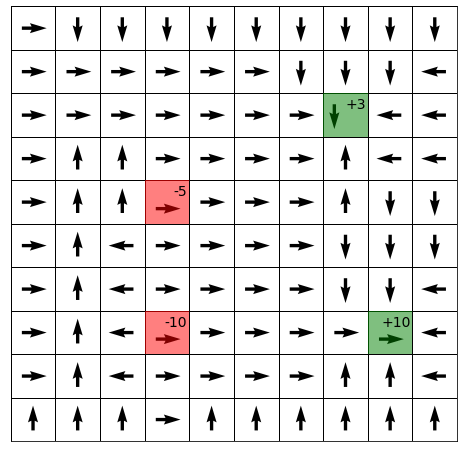

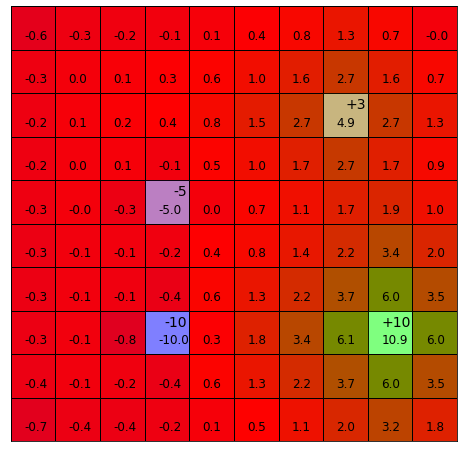

In [74]:
#value iteration + policy extraction 



#array for Values
V=np.zeros([10,10])


discount=0.7
tolerance=0.1
iterations=2000

#value iteration
cond=True
iter_count=0
while cond==True:
    Vtemp=np.zeros([10,10])
    for i in range(10):
        for j in range(10):
            Vtemp[i,j]=np.max(calcQvalues(i,j,discount,V))
    maxError=np.max(np.abs(V - Vtemp))
    V=Vtemp
    
    iter_count+=1
    if maxError<tolerance or iter_count>=iterations:
        cond=False
    
    
    
#extract optimal policy
optimal_pol=np.zeros([10,10])
for i in range(10):
    for j in range(10):
        optimal_pol[i,j]=np.argmax(calcQvalues(i,j,discount,V))
        
plotOptimalPolicy(optimal_pol)

plotValues(V)

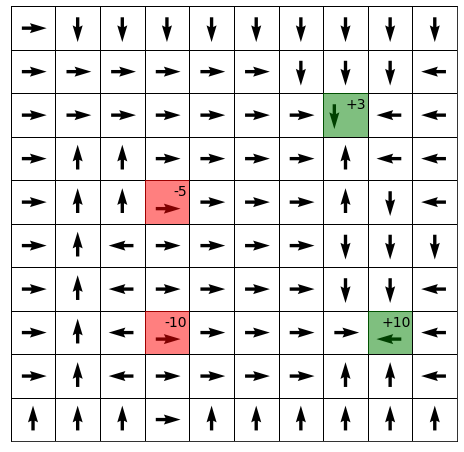

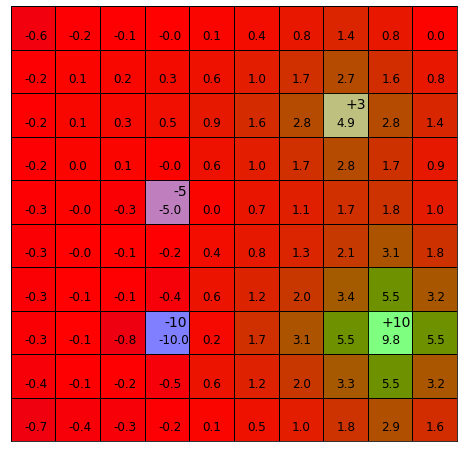

In [75]:
#policy iteration



#array for Values
V=np.zeros([10,10])
optimal_pol=np.zeros([10,10])


discount=0.7
iterations_policy=200
iterations_value=200

tolerance=0.1
cond_pol_impr=True
iter_count_pol=0

while cond_pol_impr==True:
    pol_temp=np.zeros([10,10])
    for i in range(10):
        for j in range(10):
            pol_temp[i,j]=np.argmax(calcQvalues(i,j,discount,V))
    if ((pol_temp==optimal_pol).all()) or (iter_count_pol>=iterations_policy):
        cond_pol_impr=False
    else:
        iter_count_value=0
        cond_pol_eval=True
        while cond_pol_eval==True:
            Vtemp=np.copy(V)
            for i in range(10):
                for j in range(10):
                    Vtemp[i,j]=getValueWithPolicy(i,j,discount,V,pol_temp)
            
            maxError=np.max(np.abs(Vtemp-V))
            V=Vtemp
            iter_count_value +=1
            if maxError<tolerance or iter_count_value>=iterations_value:
                cond_pol_eval=False
    iter_count_pol +=1
    optimal_pol=pol_temp





plotOptimalPolicy(optimal_pol)

plotValues(V)
